import modules

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('bmh')
import seaborn as sns
from google.colab import drive

import and read dataset

In [26]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [27]:
df = pd.read_csv('/content/gdrive/My Drive/Final Requirements Datasets/Covid-19 cases in the Philippines.csv', index_col='Case')

In [28]:
df

,Age,Sex,Nationality,Status,Transmission
Case,,,,,
PH1,38,Female,Chinese,Recovered,Imported
PH2,44,Male,Chinese,Deceased,Imported
PH3,60,Female,Chinese,Recovered,Imported
PH4,48,Male,Filipino,Recovered,Imported
PH5,62,Male,Filipino,Deceased,Local
...,...,...,...,...,...
PH1488,60,Male,None,Deceased,Local
PH1489,74,Male,Filipino,Deceased,Local
PH1508,72,Female,Filipino,Deceased,Local


set values needed for visualization

In [29]:
# create age-range column
bins = [13, 23, 33, 43, 53, 63, 74, 83, 93]
labels = ['13-22', '23-32', '33-42', '43-52', '53-62', '63-72', '73-82', '83-92']
df['Age_Range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_range = df['Age_Range'].value_counts()

# set pie graph
age_count = list(dict(age_range).items())
x = [i[1] for i in age_count]
y = [i[0] + " yrs old" for i in age_count]
explode = [0, 0, 0.1, 0, 0, 0, 0, 0]

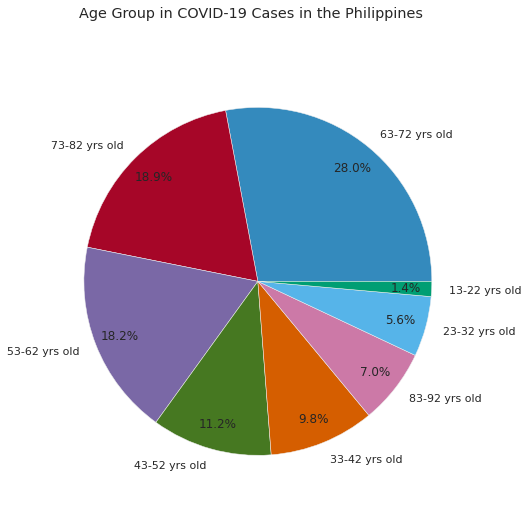

In [30]:
# create pie graph
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(x, labels=y, autopct='%1.1f%%', pctdistance=0.85)
fig.suptitle('Age Group in COVID-19 Cases in the Philippines')
fig.show()

In [31]:
# get value counts of columns based on age range
def get_age_range(col, value, df=df):
  return df[(df[col] == value)]['Age_Range'].value_counts().sort_index()

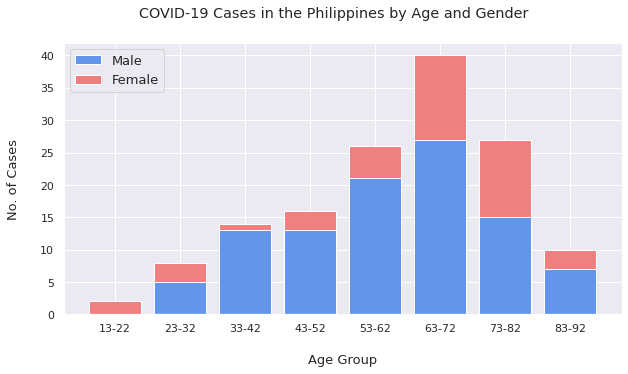

In [35]:
male_age = get_age_range('Sex', 'Male')
female_age = get_age_range('Sex', 'Female')

# create stacked bar chart
x = male_age.index
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, male_age, color='cornflowerblue')
ax.bar(x, female_age, bottom=male_age, color='lightcoral')
ax.legend(['Male', 'Female'], loc='upper left', prop={'size': 13})
ax.set_xlabel('Age Group', fontsize=13, labelpad=20)
ax.set_ylabel('No. of Cases', fontsize=13, labelpad=20)
fig.suptitle('COVID-19 Cases in the Philippines by Age and Gender')
fig.show()

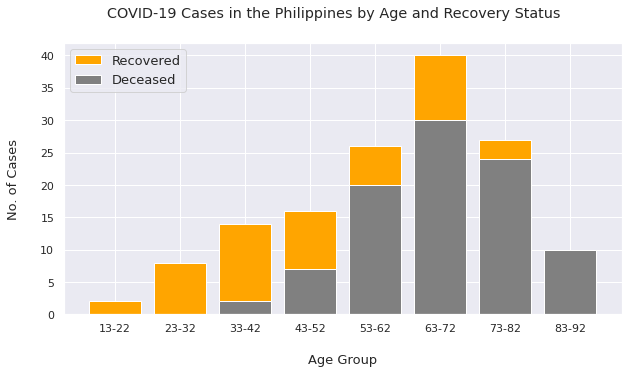

In [36]:
recovered_age = get_age_range('Status', 'Recovered')
deceased_age = get_age_range('Status', 'Deceased')

# create stacked bar chart
x = male_age.index
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, recovered_age, bottom=deceased_age, color='orange')
ax.bar(x, deceased_age, color='grey')
ax.legend(['Recovered', 'Deceased'], loc='upper left', prop={'size': 13})
ax.set_xlabel('Age Group', fontsize=13, labelpad=20)
ax.set_ylabel('No. of Cases', fontsize=13, labelpad=20)
fig.suptitle('COVID-19 Cases in the Philippines by Age and Recovery Status')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


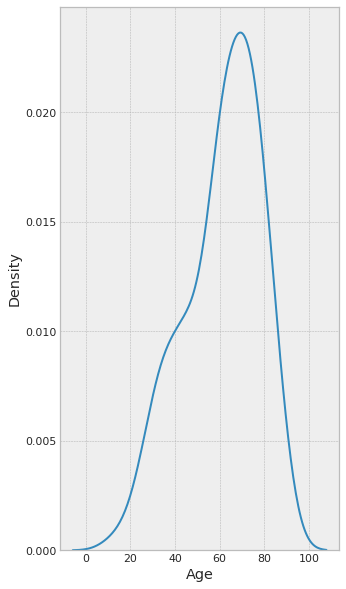

In [34]:
sns.distplot(df['Age'],hist=False)
sns.set(rc={'figure.figsize':(5,10)})
plt.show()